In [14]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

#  Artificial Neural Network(ANN)

Perceptron --> YAPAY NÖRON

Girdi1 --->

                 
               
Girdi2 ------------->                 VERİ ----> Çıktı



Bias ----->

Sigmoid Fonksiyonu = 0 ile 1 arasında değer alır ve genelde sınıfrlandırma problemlerimizde işe yarar

Tanh(Hiperbolik Tanjant) = -1 ve 1 arasında değer alır  ve negatif değerlerle daha geniş bir kapsam sağlar ve genelde sınfırlandırma operasyonlarıda kullanılır.

ReLU(Rectified Linear Unit) = 0 ve sonuz arasında değer alır ve derin öğrenme alanında sıklıkla karşımızda çıkar.
Verilen işlem - ise =0 eğer değilse verilen değilse -1 değerini alır.

Linear Fonksiyonlar f(x)= x alır sonuz değer alabilir. 

Regresyon = Çocuklaın boyları ile babaların boyları arasında bir iliki olabilir mi ?
Çocukların boyları toplam veri setindeki ortalamaya yakın olma  eğilimi gösterilebilir.
Y=a*x + b 

z=a*g +b 
f(z)=tahminiDeger(nöron'un tahmini)
Quadratic Maliyet=sum(gercekDeger - tamini deger)**2/
Cross Entropy Maliyet=(-1/n)*sum(gercekDeger*In(tahminiDeger)(1-gercekDeger)*ln(1-taminiDeger)

Gradient Descent = bir fonksiyonun minimumu bulmak için kullanıdığımız optimizasyon fonksiyonu
Maliyet fonksiyonunu minimize etmek için kullanabiliriz.

In [11]:
dataFramenew=pd.read_excel("bisiklet_fiyatlari.xlsx")

In [12]:
dataFramenew

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [13]:
dataFramenew.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


###  Verileri Seaborn Grafigi

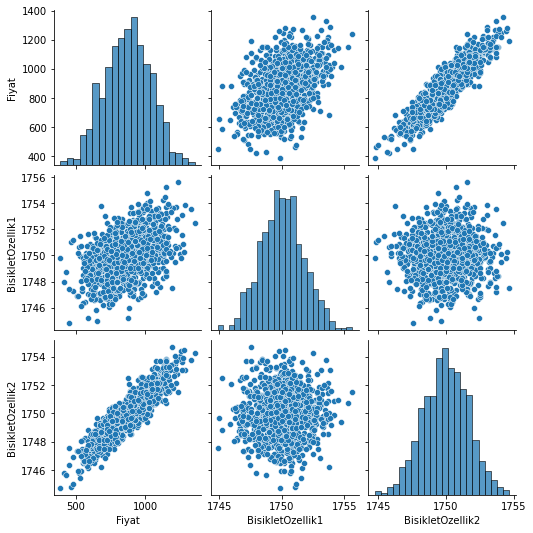

In [15]:
sbn.pairplot(dataFramenew)

#  Veriyi Test/Train Olarak 2'ye ayırmak

In [17]:
from sklearn.model_selection import train_test_split

In [28]:
#y=wx +b
#y -->label
y=dataFramenew["Fiyat"].values

#x --> feature(özellik)
x=dataFramenew[["BisikletOzellik1","BisikletOzellik2"]].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=15)

In [31]:
x_train.shape

(670, 2)

In [32]:
x_test.shape

(330, 2)

In [66]:
y_train.shape

(670,)

In [34]:
y_test.shape

(330,)

## Scaling(Verilerin boyutunu büyültmek veya küçültmek)

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler=MinMaxScaler()

In [38]:
scaler.fit(x_train)

MinMaxScaler()

# Verileri array dizilerine dönüştürme

In [39]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [40]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

# Verileri Öğretme işlemi

## Verilerin nöronlarını ve hangi fonksiyonları kullanacağımızı belirliyoruz

In [58]:
model=Sequential()
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu")) #Desen(nöronlar,hangi fonksiyonu kullanıcağı)

model.add(Dense(1))

model.compile(optimizer = "rmsprop",loss = "mse")

#  Verileri Tensorflow öğrettimi

In [59]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 795957.6875
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 795780.7500
Epoch 3/250
21/21 [==============================] - 0s 1ms/step - loss: 795606.0000
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 795430.0000
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 795210.9375
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 794949.2500
Epoch 7/250
21/21 [==============================] - 0s 1ms/step - loss: 794639.6250
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 794274.1250
Epoch 9/250
21/21 [==============================] - 0s 995us/step - loss: 793853.1875
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 793360.3125
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 792791.8125
Epoch 12/250
21/21 [==============================] - 0s 898u

21/21 [==============================] - 0s 848us/step - loss: 5678.4663
Epoch 96/250
21/21 [==============================] - 0s 848us/step - loss: 5569.0957
Epoch 97/250
21/21 [==============================] - 0s 848us/step - loss: 5464.3218
Epoch 98/250
21/21 [==============================] - 0s 798us/step - loss: 5357.8433
Epoch 99/250
21/21 [==============================] - 0s 798us/step - loss: 5250.6704
Epoch 100/250
21/21 [==============================] - 0s 847us/step - loss: 5135.6113
Epoch 101/250
21/21 [==============================] - 0s 748us/step - loss: 5030.1499
Epoch 102/250
21/21 [==============================] - 0s 748us/step - loss: 4917.3594
Epoch 103/250
21/21 [==============================] - 0s 798us/step - loss: 4817.3252
Epoch 104/250
21/21 [==============================] - 0s 748us/step - loss: 4718.7085
Epoch 105/250
21/21 [==============================] - 0s 748us/step - loss: 4612.0186
Epoch 106/250
21/21 [==============================] - 0s 798

Epoch 190/250
21/21 [==============================] - 0s 798us/step - loss: 96.2367
Epoch 191/250
21/21 [==============================] - 0s 848us/step - loss: 90.6290
Epoch 192/250
21/21 [==============================] - 0s 798us/step - loss: 89.6654
Epoch 193/250
21/21 [==============================] - 0s 798us/step - loss: 87.5568
Epoch 194/250
21/21 [==============================] - 0s 798us/step - loss: 85.0094
Epoch 195/250
21/21 [==============================] - 0s 798us/step - loss: 83.3869
Epoch 196/250
21/21 [==============================] - 0s 798us/step - loss: 82.4571
Epoch 197/250
21/21 [==============================] - 0s 748us/step - loss: 80.8106
Epoch 198/250
21/21 [==============================] - 0s 848us/step - loss: 80.4995
Epoch 199/250
21/21 [==============================] - 0s 1ms/step - loss: 78.1481
Epoch 200/250
21/21 [==============================] - 0s 798us/step - loss: 77.4905
Epoch 201/250
21/21 [==============================] - 0s 748us/ste

In [64]:
loss = model.history.history["loss"]
loss

[795957.6875,
 795780.75,
 795606.0,
 795430.0,
 795210.9375,
 794949.25,
 794639.625,
 794274.125,
 793853.1875,
 793360.3125,
 792791.8125,
 792138.5625,
 791389.75,
 790542.125,
 789584.9375,
 788516.3125,
 787329.375,
 786007.375,
 784552.1875,
 782945.5,
 781181.5625,
 779259.6875,
 777172.75,
 774904.625,
 772462.8125,
 769817.3125,
 766980.125,
 763918.25,
 760626.75,
 757093.8125,
 753281.75,
 749179.5,
 744765.6875,
 740062.375,
 735038.5,
 729659.9375,
 723920.9375,
 717870.0625,
 711413.125,
 704578.3125,
 697332.3125,
 689737.3125,
 681711.0625,
 673203.125,
 664273.0625,
 654926.3125,
 645132.3125,
 634910.5,
 624140.0625,
 612942.8125,
 601221.5625,
 589015.5,
 576394.25,
 563313.25,
 549785.8125,
 535676.5,
 521135.375,
 506114.25,
 490622.21875,
 474892.40625,
 458651.125,
 441857.15625,
 424814.90625,
 407408.25,
 389671.25,
 371608.75,
 353254.1875,
 334746.25,
 316094.375,
 297179.90625,
 278298.78125,
 259278.96875,
 240371.96875,
 221623.171875,
 202962.890625,
 18

### Verilerin kayıp Haritası

<AxesSubplot:>

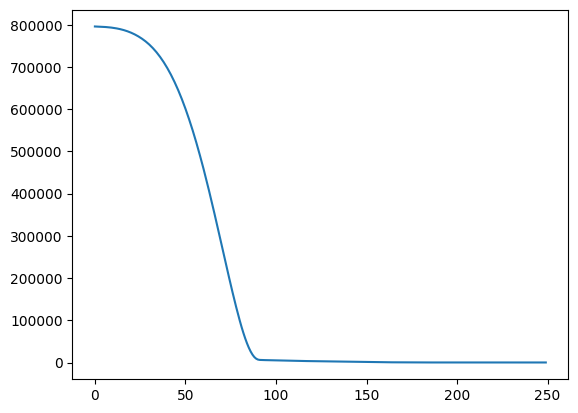

In [65]:
sbn.lineplot(x=range(len(loss)),y=loss)

### Verbose komutu kullanımı

https://keras.io/api/models/model/ dökümantasyonlarını okuyabiliriniz

In [71]:
trainLoss=model.evaluate(x_train,y_train,verbose=0)
trainLoss

73.35162353515625

In [73]:
testLoss=model.evaluate(x_test,y_test,verbose=0)
testLoss

75.0453872680664

#### Verileri Tahminleme

In [75]:
testTahminleri=model.predict(x_test)

In [76]:
testTahminleri

array([[1078.4845 ],
       [ 624.0528 ],
       [ 876.6037 ],
       [ 894.6332 ],
       [ 899.8823 ],
       [ 451.41574],
       [ 931.6502 ],
       [ 991.98724],
       [ 941.81665],
       [1017.3908 ],
       [ 751.3031 ],
       [ 918.45123],
       [ 947.98065],
       [1055.3779 ],
       [1122.2667 ],
       [ 681.81146],
       [1127.6342 ],
       [ 651.07135],
       [1155.2751 ],
       [ 887.03986],
       [ 893.3007 ],
       [ 717.1558 ],
       [ 456.98642],
       [ 612.12714],
       [ 835.4741 ],
       [1091.9464 ],
       [ 714.05646],
       [ 757.20416],
       [ 873.8899 ],
       [ 770.9582 ],
       [ 451.26315],
       [ 783.47394],
       [ 728.5894 ],
       [ 646.9982 ],
       [ 887.18976],
       [ 844.22174],
       [1036.3933 ],
       [1023.3701 ],
       [ 845.3924 ],
       [ 862.6447 ],
       [ 757.5018 ],
       [1175.3247 ],
       [1098.3203 ],
       [1088.5311 ],
       [ 873.7248 ],
       [ 596.80914],
       [1146.4122 ],
       [ 973.

#### Tahmin DataFrame Dönüştürme

In [77]:
tahminDataFrame=pd.DataFrame(y_test,columns=["Gercek Y"])

In [78]:
tahminDataFrame

,Gercek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


#### Test Verilerimizi Series Çevirilmesi

In [82]:
testTahminleri=pd.Series(testTahminleri.reshape(330,))

In [83]:
testTahminleri

0      1078.484497
1       624.052795
2       876.603699
3       894.633179
4       899.882324
          ...     
325    1014.198547
326     791.135742
327     766.355530
328    1168.403076
329     803.054749
Length: 330, dtype: float32

#### Tahmin ve Gerçek verileri Birleştirme

In [84]:
tahminDataFrame=pd.concat([tahminDataFrame,testTahminleri],axis=1)

In [85]:
tahminDataFrame

,Gercek Y,0
0,1081.652164,1078.484497
1,622.675990,624.052795
2,889.356810,876.603699
3,902.826733,894.633179
4,897.662404,899.882324
...,...,...
325,1028.438035,1014.198547
326,789.934950,791.135742
327,758.490486,766.355530
328,1172.871659,1168.403076


In [86]:
tahminDataFrame.columns=["Gerçek Y","Tahmin Y"]

In [87]:
tahminDataFrame

,Gerçek Y,Tahmin Y
0,1081.652164,1078.484497
1,622.675990,624.052795
2,889.356810,876.603699
3,902.826733,894.633179
4,897.662404,899.882324
...,...,...
325,1028.438035,1014.198547
326,789.934950,791.135742
327,758.490486,766.355530
328,1172.871659,1168.403076


####  Verileri Regresyon grafigi üzerinden gösterme

<AxesSubplot:xlabel='Gerçek Y', ylabel='Tahmin Y'>

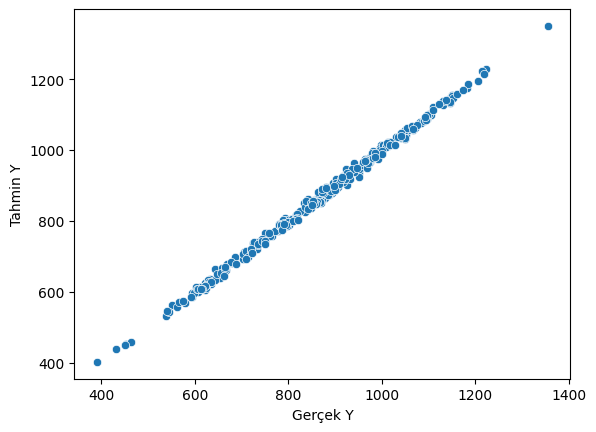

In [88]:
sbn.scatterplot(x="Gerçek Y",y="Tahmin Y",data=tahminDataFrame)

#### Verinin Hata Oranını Bulma

In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [90]:
mean_absolute_error(tahminDataFrame["Gerçek Y"],tahminDataFrame["Tahmin Y"])

6.937070672196967

In [91]:
mean_squared_error(tahminDataFrame["Gerçek Y"],tahminDataFrame["Tahmin Y"])

75.04540333494191

In [92]:
dataFramenew.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


In [93]:
tahminDataFrame.describe()

,Gerçek Y,Tahmin Y
count,330.000000,330.000000
mean,863.895735,862.627075
std,164.649126,164.931396
min,390.856887,402.127045
25%,745.553041,744.875900
50%,878.239496,878.901154
75%,979.817018,978.559067
max,1355.213745,1350.132080


In [98]:
yeniBisikletOzellikleri=[[1753,1751]]

In [99]:
yeniBisikletOzellikleri=scaler.transform(yeniBisikletOzellikleri)

In [100]:
yeniBisikletOzellikleri

array([[0.75368734, 0.62095915]])

In [101]:
model.predict(yeniBisikletOzellikleri)

array([[1083.9155]], dtype=float32)

#### Model Kaydetme

In [103]:
from tensorflow.keras.models import load_model

In [104]:
model.save("bisiklet_modeli.h5")

In [105]:
sonradanCagirilanModel=load_model("bisiklet_modeli.h5")

In [106]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri)

array([[1083.9155]], dtype=float32)